# Pure component properties for Butane

In [1]:
import numpy as np
from epcsaftpy import component, pcsaft 

**Parameters from:** <br> 
J. Gross and G. Sadowski, *Ind. Eng. Chem. Res.*, 2001, **40**(4), 5510–5515 (https://doi.org/10.1021/ie0003887)

In [2]:
c4 = component('Butane', ms = 2.3316, sigma = 3.7086, eps = 222.88, Mw = 58.1222)
saft = pcsaft(c4)

**Critical point calculation**

In [3]:
print('Critical point calculation success: ', saft.critical)
if saft.critical:
    print(f' * Critical temperature : {round(saft.Tc,4)} K')
    print(f' * Critical pressure    : {round(saft.Pc,4)} Pa')
    print(f' * Critical density     : {round(saft.rhoc,4)} mol/m^3')

Critical point calculation success:  True
 * Critical temperature : 432.5037 K
 * Critical pressure    : 4218673.6108 Pa
 * Critical density     : 3773.3371 mol/m^3


**Density calculation**

In [4]:
T = 298.15   # K
P = 1.01325e5  # Pa
rhoL = saft.density(T, P, 'L')
rhoV = saft.density(T, P, 'V')
print(f'Liquid density : {round(rhoL,4)} mol/m3')
print(f'Vapor density  : {round(rhoV,4)} mol/m3')

Liquid density : 9818.402 mol/m3
Vapor density  : 41.9766 mol/m3


**Pressure calculation**

In [5]:
T = 298.15   # K
P = saft.pressure(rhoL, T)
print(f'Pressure : {round(P,4)} Pa')

Pressure : 101325.0 Pa


**Saturation pressure**

In [6]:
T = 298.15   # K
Psat, vL, vV = saft.psat(T)
print(f'Saturation pressure    : {round(Psat,4)} Pa')
print(f'Liquid volume          : {round(vL,8)} m3/mol')
print(f'Vapor volume           : {round(vV,8)} m3/mol')

Saturation pressure    : 244364.5582 Pa
Liquid volume          : 0.0001018 m3/mol
Vapor volume           : 0.00948114 m3/mol


**Saturation temperature**

In [7]:
P = 244364.5582   # Pa
T0 = 250.0        # K
Tsat, vL, vV = saft.tsat(P, T0 = T0)
print(f'Saturation temperature : {round(Tsat,4)} K')
print(f'Liquid volume          : {round(vL,8)} m3/mol')
print(f'Vapor volume           : {round(vV,8)} m3/mol')

Saturation temperature : 298.15 K
Liquid volume          : 0.0001018 m3/mol
Vapor volume           : 0.00948114 m3/mol


**Chemical potentials**

In [8]:
Tsat = 298.15   # K
Psat, vL, vV = saft.psat(Tsat)
muL = saft.muad(1/vL, Tsat)
muV = saft.muad(1/vV, Tsat)
print(f'Liquid chemical potentials : {round(muL,5)} ')
print(f'Vapor chemical potentials  : {round(muV,5)} ')

Liquid chemical potentials : 3717.97669 
Vapor chemical potentials  : 3717.97669 


**Fugacity coefficients**

In [9]:
logfugL, vL = saft.logfug(Tsat, Psat, 'L')
logfugV, vV = saft.logfug(Tsat, Psat, 'V')
print(f'Liquid fugacity coefficients : {round(logfugL,8)} ')
print(f'Vapor fugacity coefficients  : {round(logfugV,8)} ')

Liquid fugacity coefficients : -0.06365885 
Vapor fugacity coefficients  : -0.06365885 


**Vaporization entropy**

In [10]:
Sl = saft.EntropyR(Tsat, Psat, 'L')
Sv = saft.EntropyR(Tsat, Psat, 'V')
Svap = Sv - Sl
print(f'Vaporization entropy   : {round(Svap,4)} J/mol K')
print(f'Liquid entropy         : {round(Sl,4)} J/mol K')
print(f'Vapor entropy          : {round(Sv,4)} J/mol K')

Vaporization entropy   : 71.1914 J/mol K
Liquid entropy         : -72.1644 J/mol K
Vapor entropy          : -0.973 J/mol K


**Vaporization enthalpy**

In [11]:
Hl = saft.EnthalpyR(Tsat, Psat, 'L')
Hv = saft.EnthalpyR(Tsat, Psat, 'V')
Hvap = Hv - Hl
print(f'Vaporization entropy   : {round(Hvap,4)} J/mol')
print(f'Liquid entropy         : {round(Hl,4)} J/mol')
print(f'Vapor entropy          : {round(Hv,4)} J/mol')

Vaporization entropy   : 21225.7115 J/mol
Liquid entropy         : -21673.6239 J/mol
Vapor entropy          : -447.9124 J/mol


**Isochoric and isobaric residual heats capacities**

In [12]:
cvr = saft.CvR(1/vL, Tsat)
cpr = saft.CpR(Tsat, Psat, 'L')
print(f'Liquid isochoric heat capacity : {round(cvr,4)} J / mol K')
print(f'Liquid isobaric heat capacity  : {round(cpr,4)} J / mol K')

Liquid isochoric heat capacity : 16.9505 J / mol K
Liquid isobaric heat capacity  : 44.386 J / mol K


**Speed of sound**

In [13]:
r = 8.314  # J / mol K
# Ideal heat capacity from DIPPR 801 for butane.
k1 = 71340.
k2 = 243000.
k3 = 1630.
k4 = 150330.
k5 = 730.42

CpId = k1 + k2 * ((k3/Tsat) /np.sinh(k3/Tsat))**2
CpId += k4 * ((k5/Tsat) /np.cosh(k5/Tsat))**2
CpId /= 1000.

CvId = CpId - r

umax = saft.speed_sound(Tsat, Psat, 'L', CvId=CvId, CpId=CpId)
print(f'Liquid speed of sound  : {round(umax,4)} m / s')

Liquid speed of sound  : 829.9171 m / s


# Pure diagrams for Butane

In [14]:
import matplotlib.pyplot as plt

VLE calculation from a lower temperature to the critical point

In [15]:
T0 = 100.
Tf = saft.Tc
n = 500                            # Number of points
Tsat = np.linspace(T0, Tf, n)      # Temperature vector
Psat = np.zeros_like(Tsat)         # Vector to save the information
vLsat   = np.zeros_like(Tsat)
vVsat   = np.zeros_like(Tsat)
for i in range(n - 1):                   
    Psat[i], vLsat[i], vVsat[i] = saft.psat(Tsat[i])                # Solving and saving the VLE
Psat[-1], vLsat[-1], vVsat[-1] = saft.Pc, 1/saft.rhoc, 1/saft.rhoc  # Saving the critical point

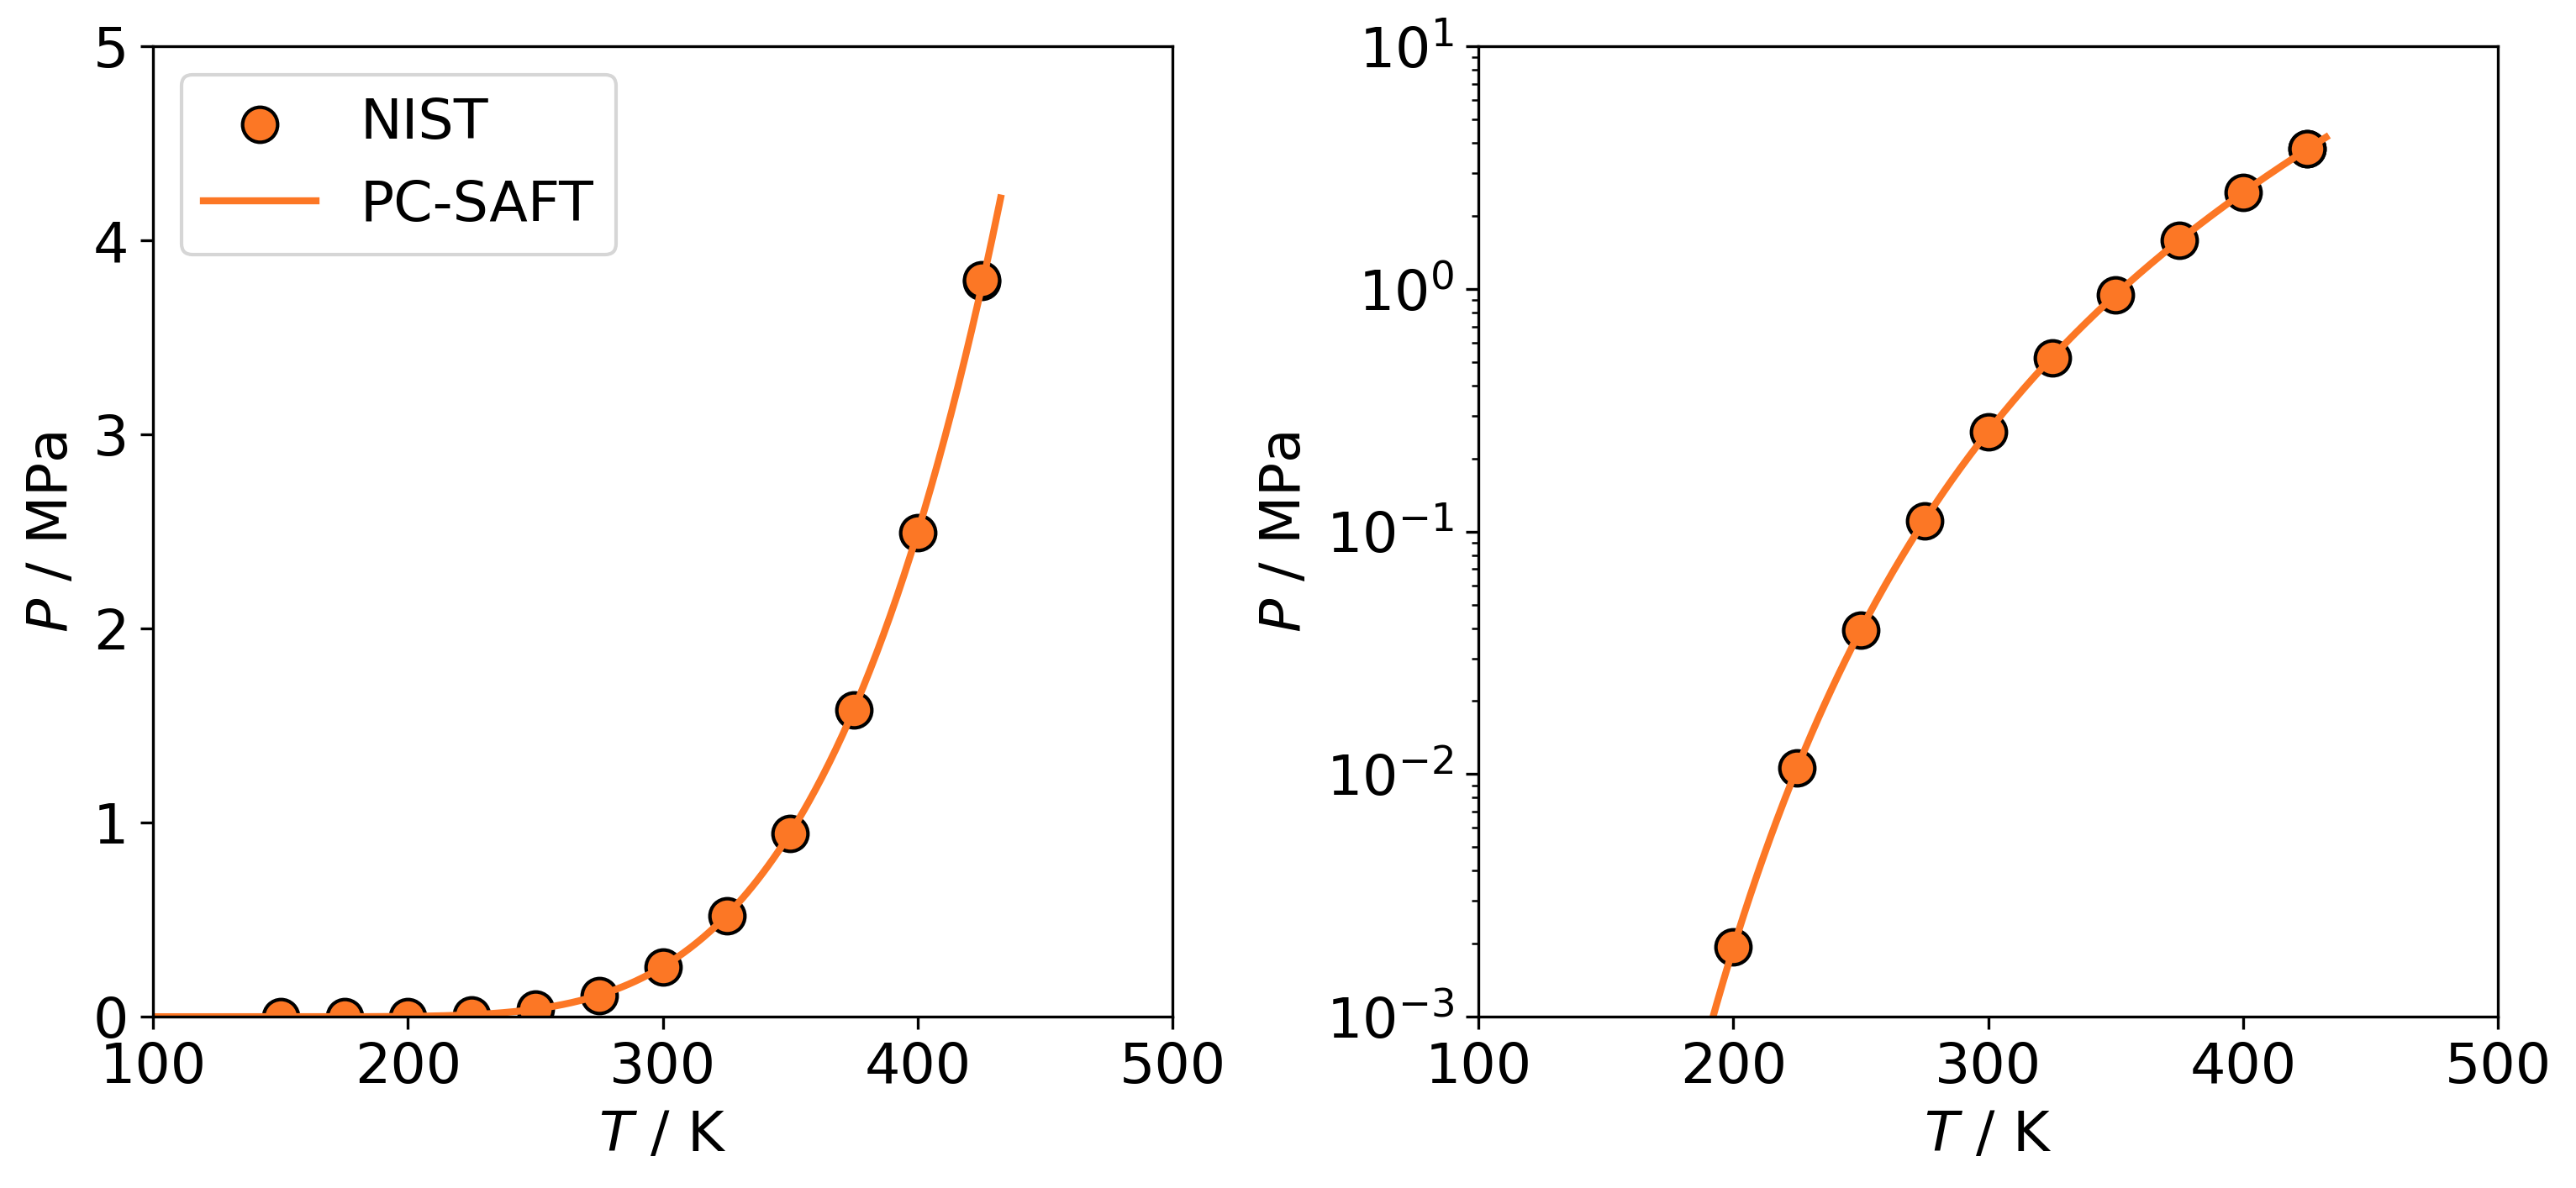

In [16]:
# NIST information
Tsat_NIST = np.array([150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 425.125]) # K
Psat_NIST = np.array([8.57E-06, 0.00020064, 0.001939, 0.010573, 0.039153, 0.11065, 
                      0.2576, 0.52012, 0.94417, 1.5816, 2.4954, 3.7881, 3.7960])  # MPa

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


colorVLE = "#FC7725"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
ax.scatter(Tsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "NIST")
ax.plot(Tsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")

ax.set_xlabel('$T$ / K')
ax.set_ylabel('$P$ / MPa')
ax.axis([100, 500., 0, 5.])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 6))

ax.legend()

ax = axs[1]
ax.plot(Tsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.scatter(Tsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "NIST")
ax.set_xlabel('$T$ / K')
ax.set_ylabel('$P$ / MPa')
ax.axis([100, 500., 1e-3, 10.])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))

ax.set_yscale('log')

plt.show()

Isothermal calculation

In [17]:
T1 = 298.15  
Psat1, vLsat1, vVsat1 = saft.psat(T1)
P0 = 1e-3
Pf = 1000e6
n = 500                            # Number of points
PV1 = np.linspace(P0, Psat1, n)    # Pressure vector for vapor phase
PL1 = np.linspace(Psat1, Pf, n)    # Pressure vector for liquid phase
vL1   = np.zeros_like(PL1)
vV1   = np.zeros_like(PV1)
for i in range(n):
    vL1[i] =  1/saft.density(T1, PL1[i], 'L')     
    vV1[i] =  1/saft.density(T1, PV1[i], 'V')     


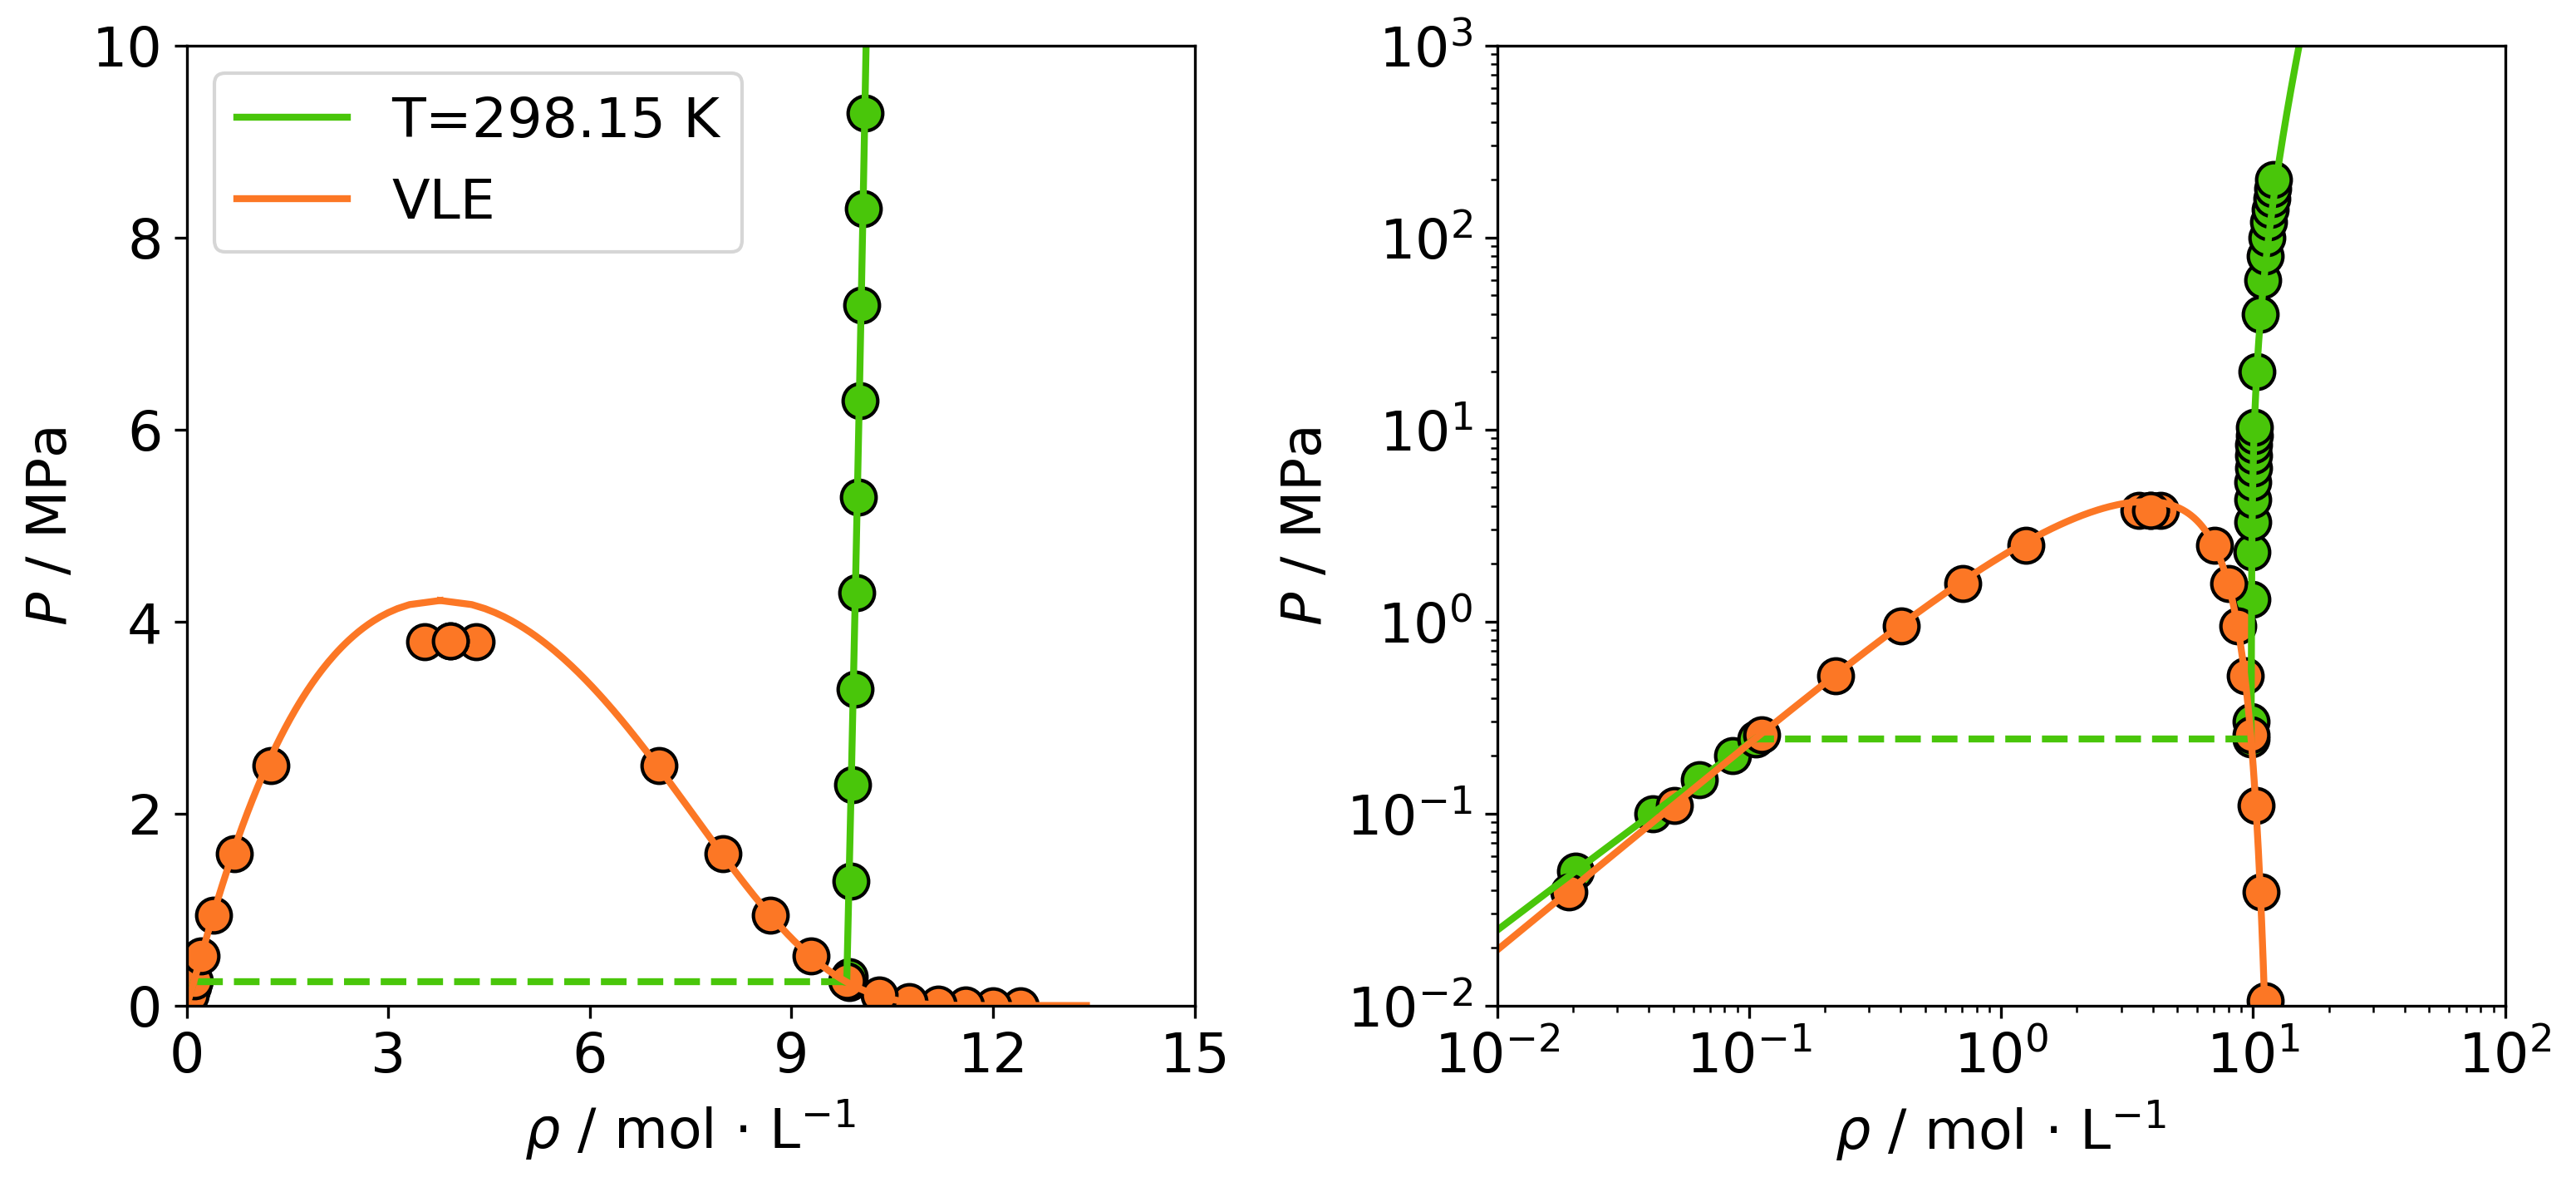

In [18]:
# NIST information
Tsat_NIST = np.array([150, 175, 200, 225, 250, 275, 300, 325, 
                      350, 375, 400, 425, 425.125])                            # K
Psat_NIST = np.array([8.57E-06, 0.00020064, 0.001939, 0.010573,
                      0.039153, 0.11065, 0.2576, 0.52012, 0.94417, 
                      1.5816, 2.4954, 3.7881, 3.7960, ])                       # MPa
rhoLsat_NIST = np.array([12.403, 12.002, 11.596, 11.182, 10.752, 10.301, 
                         9.8186, 9.2899, 8.6916, 7.9783, 7.028, 
                         4.3042, 3.922769614])                                 # mol / L
rhoVsat_NIST = np.array([0.000006874, 0.00013795, 0.0011686, 0.0056973, 
                         0.019239, 0.050611, 0.11212, 0.22075, 0.40241, 
                         0.70553, 1.2573, 3.5364, 3.922769614])                # mol / L

P1_NIST = np.array([0.05, 0.1, 0.15, 0.2, 0.24329,0.24329, 0.3, 1.3, 
                    2.3, 3.3, 4.3, 5.3, 6.3, 7.3, 8.3, 9.3, 10.3, 
                    20, 40, 60, 80, 100, 120, 140, 160, 180, 200])             # MPa
rho1_NIST = np.array([0.020468, 0.041572, 0.063375, 0.085952, 0.10619, 
                      9.8557, 9.8574, 9.887, 9.9157, 9.9436, 9.9708, 
                      9.9974, 10.023, 10.049, 10.073, 10.097, 10.121, 
                      10.328, 10.669, 10.94, 11.168, 11.365, 11.541, 
                      11.7, 11.845, 11.979, 12.104])                           # mol / L

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


color1 = "#49C60A"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
# Isothermal
ax.scatter(rho1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(1e-3/vV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([1e-3/vLsat1, 1e-3/vVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(rhoLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(rhoVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(1e-3/vVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)

# Plot configurations
ax.set_xlabel(r'$\rho$ / mol $\cdot$ L$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([0, 15., 0, 10.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 6))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 6))
ax.legend()


ax = axs[1]
# Isothermal
ax.scatter(rho1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(1e-3/vV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([1e-3/vLsat1, 1e-3/vVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(rhoLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(rhoVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(1e-3/vVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)
# Plot configurations
ax.set_xlabel(r'$\rho$ / mol $\cdot$ L$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([1e-2, 100., 1e-2, 1000.])
ax.set_yscale('log')
ax.set_xscale('log')

plt.show()

Thermal properties: heat capacities 

In [19]:
# Ideal heat capacity from DIPPR 801 for butane.
r = 8.314  # J / mol K
k1, k2, k3, k4, k5 = 71340., 243000., 1630., 150330., 730.42
def CpCvId(T):
    CpId = k1 + k2 * ((k3/T) /np.sinh(k3/T))**2
    CpId += k4 * ((k5/T) /np.cosh(k5/T))**2
    CpId /= 1000.
    CvId = CpId - r
    return CpId, CvId

# Calculation in the VLE
n = len(Psat)
CpLsat = np.zeros_like(Psat)
CvLsat = np.zeros_like(Psat)
CpVsat = np.zeros_like(Psat)
CvVsat = np.zeros_like(Psat)
for i in range(n):
    CpId, CvId = CpCvId(Tsat[i])
    CvLsat[i] = saft.CvR(1/vLsat[i], Tsat[i]) + CvId
    CpLsat[i] = saft.CpR(Tsat[i], Psat[i], 'L') + CpId
    CvVsat[i] = saft.CvR(1/vVsat[i], Tsat[i]) + CvId
    CpVsat[i] = saft.CpR(Tsat[i], Psat[i], 'V') + CpId
    
# Calculation in the isothermal
CpId, CvId = CpCvId(T1)
CvLsat1 = saft.CvR(1/vLsat1, T1) + CvId
CpLsat1 = saft.CpR(T1, Psat1, 'L') + CpId
CvVsat1 = saft.CvR(1/vVsat1, T1) + CvId
CpVsat1 = saft.CpR(T1, Psat1, 'V') + CpId

n = len(PL1)
CpL1 = np.zeros_like(PL1)
CvL1 = np.zeros_like(PL1)
CpV1 = np.zeros_like(PL1)
CvV1 = np.zeros_like(PL1)
for i in range(n):
    CvL1[i] = saft.CvR(1/vL1[i], T1) + CvId
    CpL1[i] = saft.CpR(T1, PL1[i], 'L') + CpId
    CvV1[i] = saft.CvR(1/vV1[i], T1) + CvId
    CpV1[i] = saft.CpR(T1, PV1[i], 'V') + CpId
    

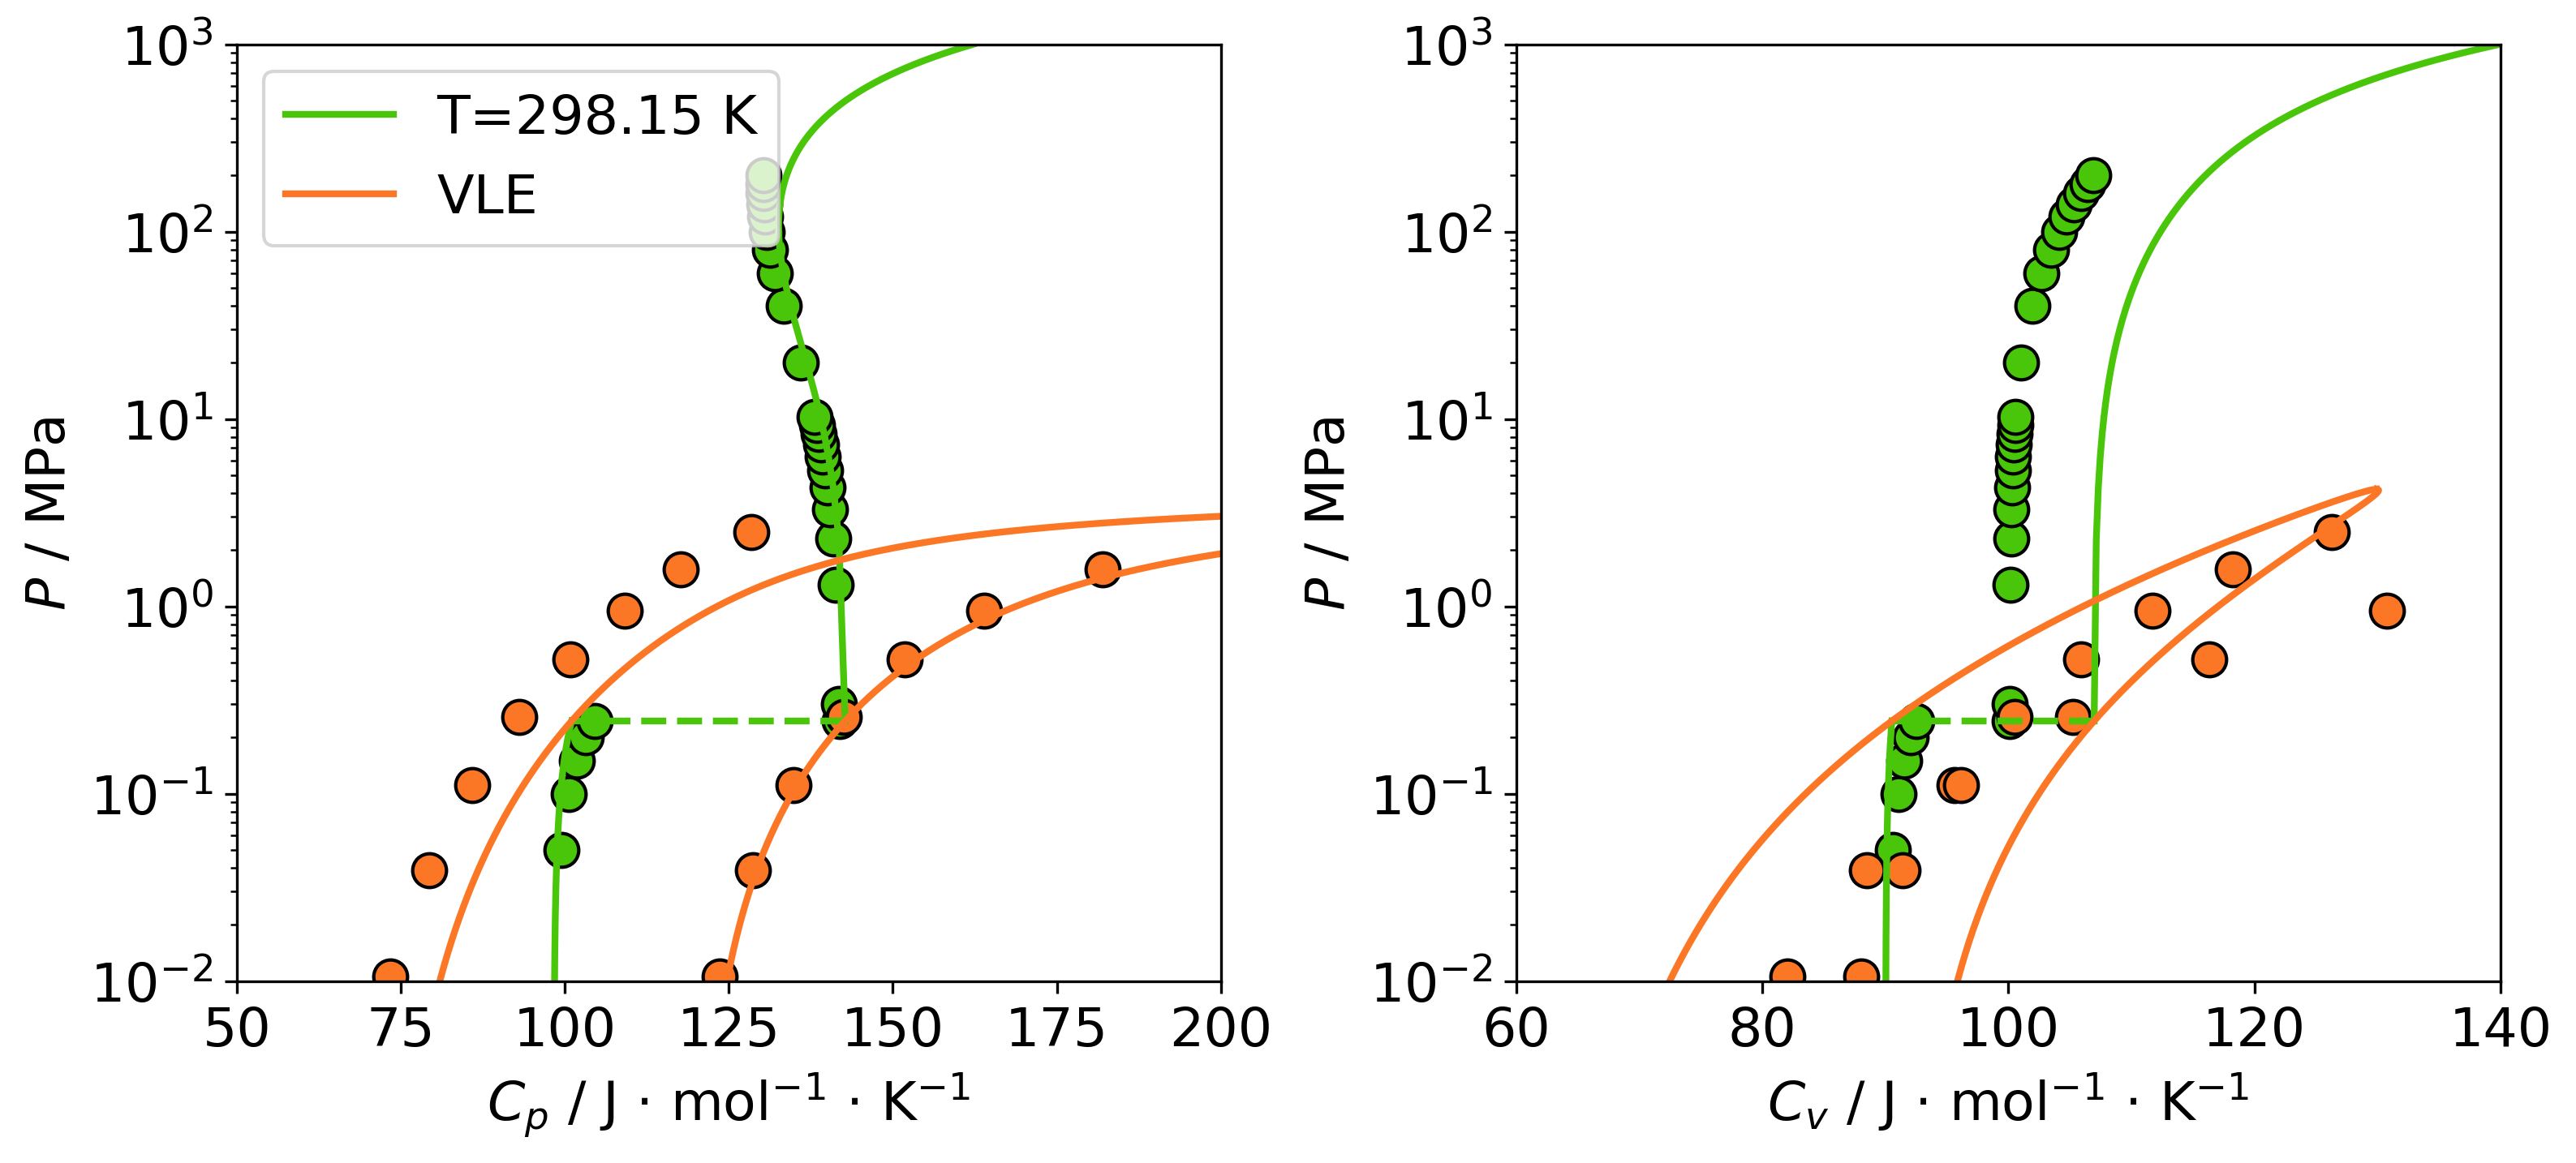

In [20]:
# NIST information
Tsat_NIST = np.array([150, 175, 200, 225, 250, 275, 300, 325, 
                      350, 375, 400])                                          # K
Psat_NIST = np.array([8.57E-06, 0.00020064, 0.001939, 0.010573,
                      0.039153, 0.11065, 0.2576, 0.52012, 0.94417, 
                      1.5816, 2.4954])                                         # MPa  
CpLsat_NIST = np.array([115.44, 117.19, 119.86, 123.65, 128.64, 
                        134.88, 142.47, 151.79, 163.89, 182.02, 223.05])       # J/mol K
CvLsat_NIST = np.array([83.831, 84.269, 85.627, 88.037, 91.428, 
                        95.645, 100.51, 105.89, 111.73, 118.23, 126.28])       # J/mol K      
CpVsat_NIST = np.array([59.003, 63.571, 68.227, 73.403, 79.281, 85.872, 
                        93.098, 100.87, 109.1, 117.73, 128.42])                # J/mol K
CvVsat_NIST = np.array([67.319, 71.903,76.64, 82.063, 88.498, 96.154, 
                        105.27, 116.36, 130.8, 153.28, 210.57])                # J/mol K    

P1_NIST = np.array([0.05, 0.1, 0.15, 0.2, 0.24329,0.24329, 0.3, 1.3, 
                    2.3, 3.3, 4.3, 5.3, 6.3, 7.3, 8.3, 9.3, 10.3, 
                    20, 40, 60, 80, 100, 120, 140, 160, 180, 200])             # MPa
Cp1_NIST = np.array([99.501, 100.62, 101.86, 103.22, 104.53, 141.86, 
                      141.83, 141.34, 140.89, 140.46, 140.07, 139.69, 
                      139.34, 139, 138.69, 138.39, 138.1, 135.94, 133.41, 
                      132.07, 131.28, 130.81, 130.53, 130.37, 130.3, 
                      130.29, 130.32])                                         # J/mol K 
Cv1_NIST = np.array([90.596, 91.055, 91.543, 92.064, 92.544, 100.13, 
                      100.13, 100.18, 100.22, 100.27, 100.32, 100.36, 
                      100.41, 100.46, 100.5, 100.55, 100.6, 101.05, 
                      101.93, 102.72, 103.46, 104.13, 104.76, 105.35, 
                      105.91, 106.44, 106.94])                                 # J/mol K 

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


color1 = "#49C60A"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
# Isothermal
ax.scatter(Cp1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(CpL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(CpV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([CpLsat1, CpVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(CpLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(CpVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(CpLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(CpVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)
# Plot configurations
ax.legend()
ax.set_xlabel(r'$C_p$ / J $\cdot$ mol$^{-1}$ $\cdot$ K$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([50, 200., 1e-2, 1000.])
ax.set_yscale('log')


ax = axs[1]
# Isothermal
ax.scatter(Cv1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(CvL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(CvV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([CvLsat1, CvVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(CvLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(CvVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(CvLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(CvVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)
# Plot configurations
ax.set_xlabel(r'$C_v$ / J $\cdot$ mol$^{-1}$ $\cdot$ K$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([60, 140., 1e-2, 1000.])
ax.set_yscale('log')

plt.show()

Thermal properties: enthalpy and entropy

In [21]:
# Calculation in the VLE
n = len(Psat)
HLsat = np.zeros_like(Psat)
HVsat = np.zeros_like(Psat)
SLsat = np.zeros_like(Psat)
SVsat = np.zeros_like(Psat)

for i in range(n):
    HLsat[i] = saft.EnthalpyR(Tsat[i], Psat[i], 'L') 
    HVsat[i] = saft.EnthalpyR(Tsat[i], Psat[i], 'V') 
    SLsat[i] = saft.EntropyR(Tsat[i], Psat[i], 'L') 
    SVsat[i] = saft.EntropyR(Tsat[i], Psat[i], 'V')
dHvap = HVsat - HLsat     
dSvap = SVsat - SLsat

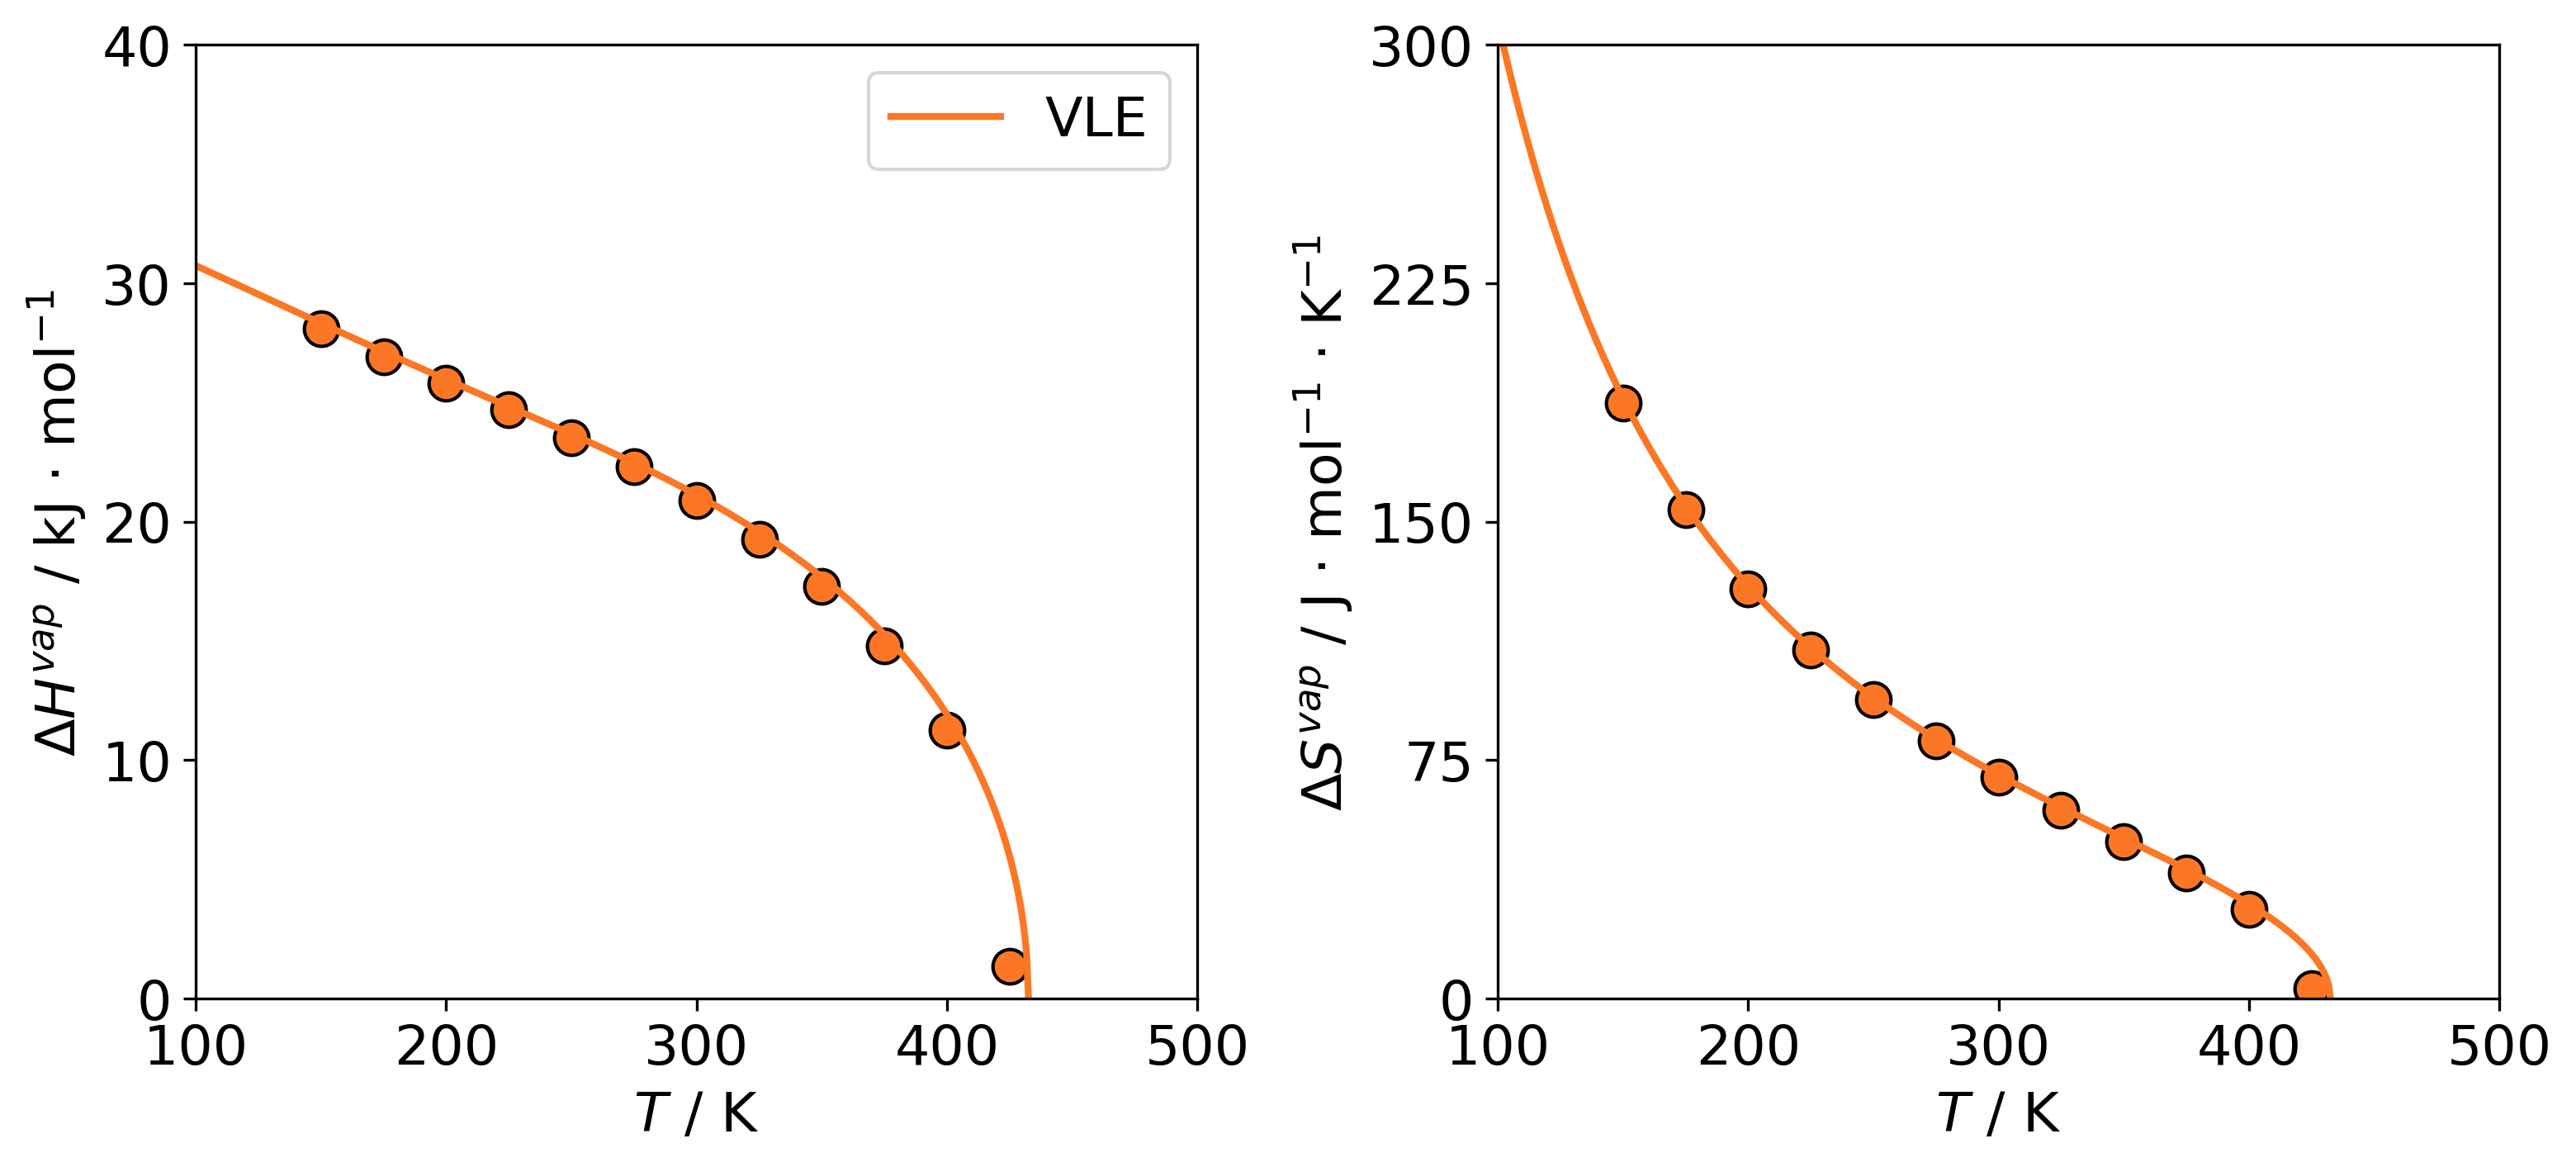

In [22]:
# NIST information
Tsat_NIST = np.array([150, 175, 200, 225, 250, 275, 300, 325, 
                      350, 375, 400, 425.])                                    # K
Psat_NIST = np.array([8.57E-06, 0.00020064, 0.001939, 0.010573,
                      0.039153, 0.11065, 0.2576, 0.52012, 0.94417, 
                      1.5816, 2.4954, 3.7881])                                 # MPa  
HLsat_NIST = np.array([-3.483, -0.57677, 2.3842, 5.4261, 8.5788, 
                       11.874, 15.344, 19.026, 22.967, 27.243, 
                       32.038, 39.674])                                        # kJ/mol
HVsat_NIST = np.array([24.598, 26.337, 28.179, 30.111, 32.116, 
                       34.17, 36.244, 38.297, 40.27, 42.043, 
                       43.313, 41.02])                                         # kJ/mol     
SLsat_NIST = np.array([-14.823, 3.0929, 18.903, 33.227, 46.498, 
                       59.03, 71.052, 82.747, 94.284, 105.87, 
                       117.92, 135.81])                                        # J/mol K
SVsat_NIST = np.array([172.38, 156.88, 147.87, 142.94, 140.65, 
                       140.11, 140.72, 142.04, 143.72, 145.33, 
                       146.11, 138.97])                                        # J/mol K    



font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


color1 = "#49C60A"


fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]

# VLE
ax.scatter(Tsat_NIST, HVsat_NIST - HLsat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(Tsat, dHvap * 1e-3, color = colorVLE , 
        linewidth = 2.0, label = "VLE")

# Plot configurations
ax.legend()
ax.set_ylabel(r'$\Delta H^{vap}$ / kJ $\cdot$ mol$^{-1}$')
ax.set_xlabel('$T$ / K')
ax.axis([100, 500., 0, 40.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))

ax = axs[1]
ax.scatter(Tsat_NIST, SVsat_NIST - SLsat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(Tsat, dSvap, color = colorVLE , 
        linewidth = 2.0, label = "VLE")

# Plot configurations
ax.set_ylabel(r'$\Delta S^{vap}$ / J $\cdot$ mol$^{-1}$ $\cdot$ K$^{-1}$')
ax.set_xlabel('$T$ / K')
ax.axis([100, 500., 0, 300.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()

Thermal properties: Speed of sound

In [23]:
# Ideal heat capacity from DIPPR 801 for butane.
r = 8.314  # J / mol K
k1, k2, k3, k4, k5 = 71340., 243000., 1630., 150330., 730.42
def CpCvId(T):
    CpId = k1 + k2 * ((k3/T) /np.sinh(k3/T))**2
    CpId += k4 * ((k5/T) /np.cosh(k5/T))**2
    CpId /= 1000.
    CvId = CpId - r
    return CpId, CvId

# Calculation in the VLE
n = len(Psat)
uLsat = np.zeros_like(Psat)
uVsat = np.zeros_like(Psat)

for i in range(n):
    CpId, CvId = CpCvId(Tsat[i])
    uLsat[i] = saft.speed_sound(Tsat[i], Psat[i], 'L', CvId=CvId, CpId=CpId)
    uVsat[i] = saft.speed_sound(Tsat[i], Psat[i], 'V', CvId=CvId, CpId=CpId)

    
# Calculation in the isothermal
CpId, CvId = CpCvId(T1)
uLsat1 = saft.speed_sound(T1, Psat1, 'L', CvId=CvId, CpId=CpId)
uVsat1 = saft.speed_sound(T1, Psat1, 'V', CvId=CvId, CpId=CpId)

n = len(PL1)
uL1 = np.zeros_like(PL1)
uV1 = np.zeros_like(PL1)
for i in range(n):
    uL1[i] = saft.speed_sound(T1, PL1[i], 'L', CvId=CvId, CpId=CpId)
    uV1[i] = saft.speed_sound(T1, PV1[i], 'V', CvId=CvId, CpId=CpId)
    

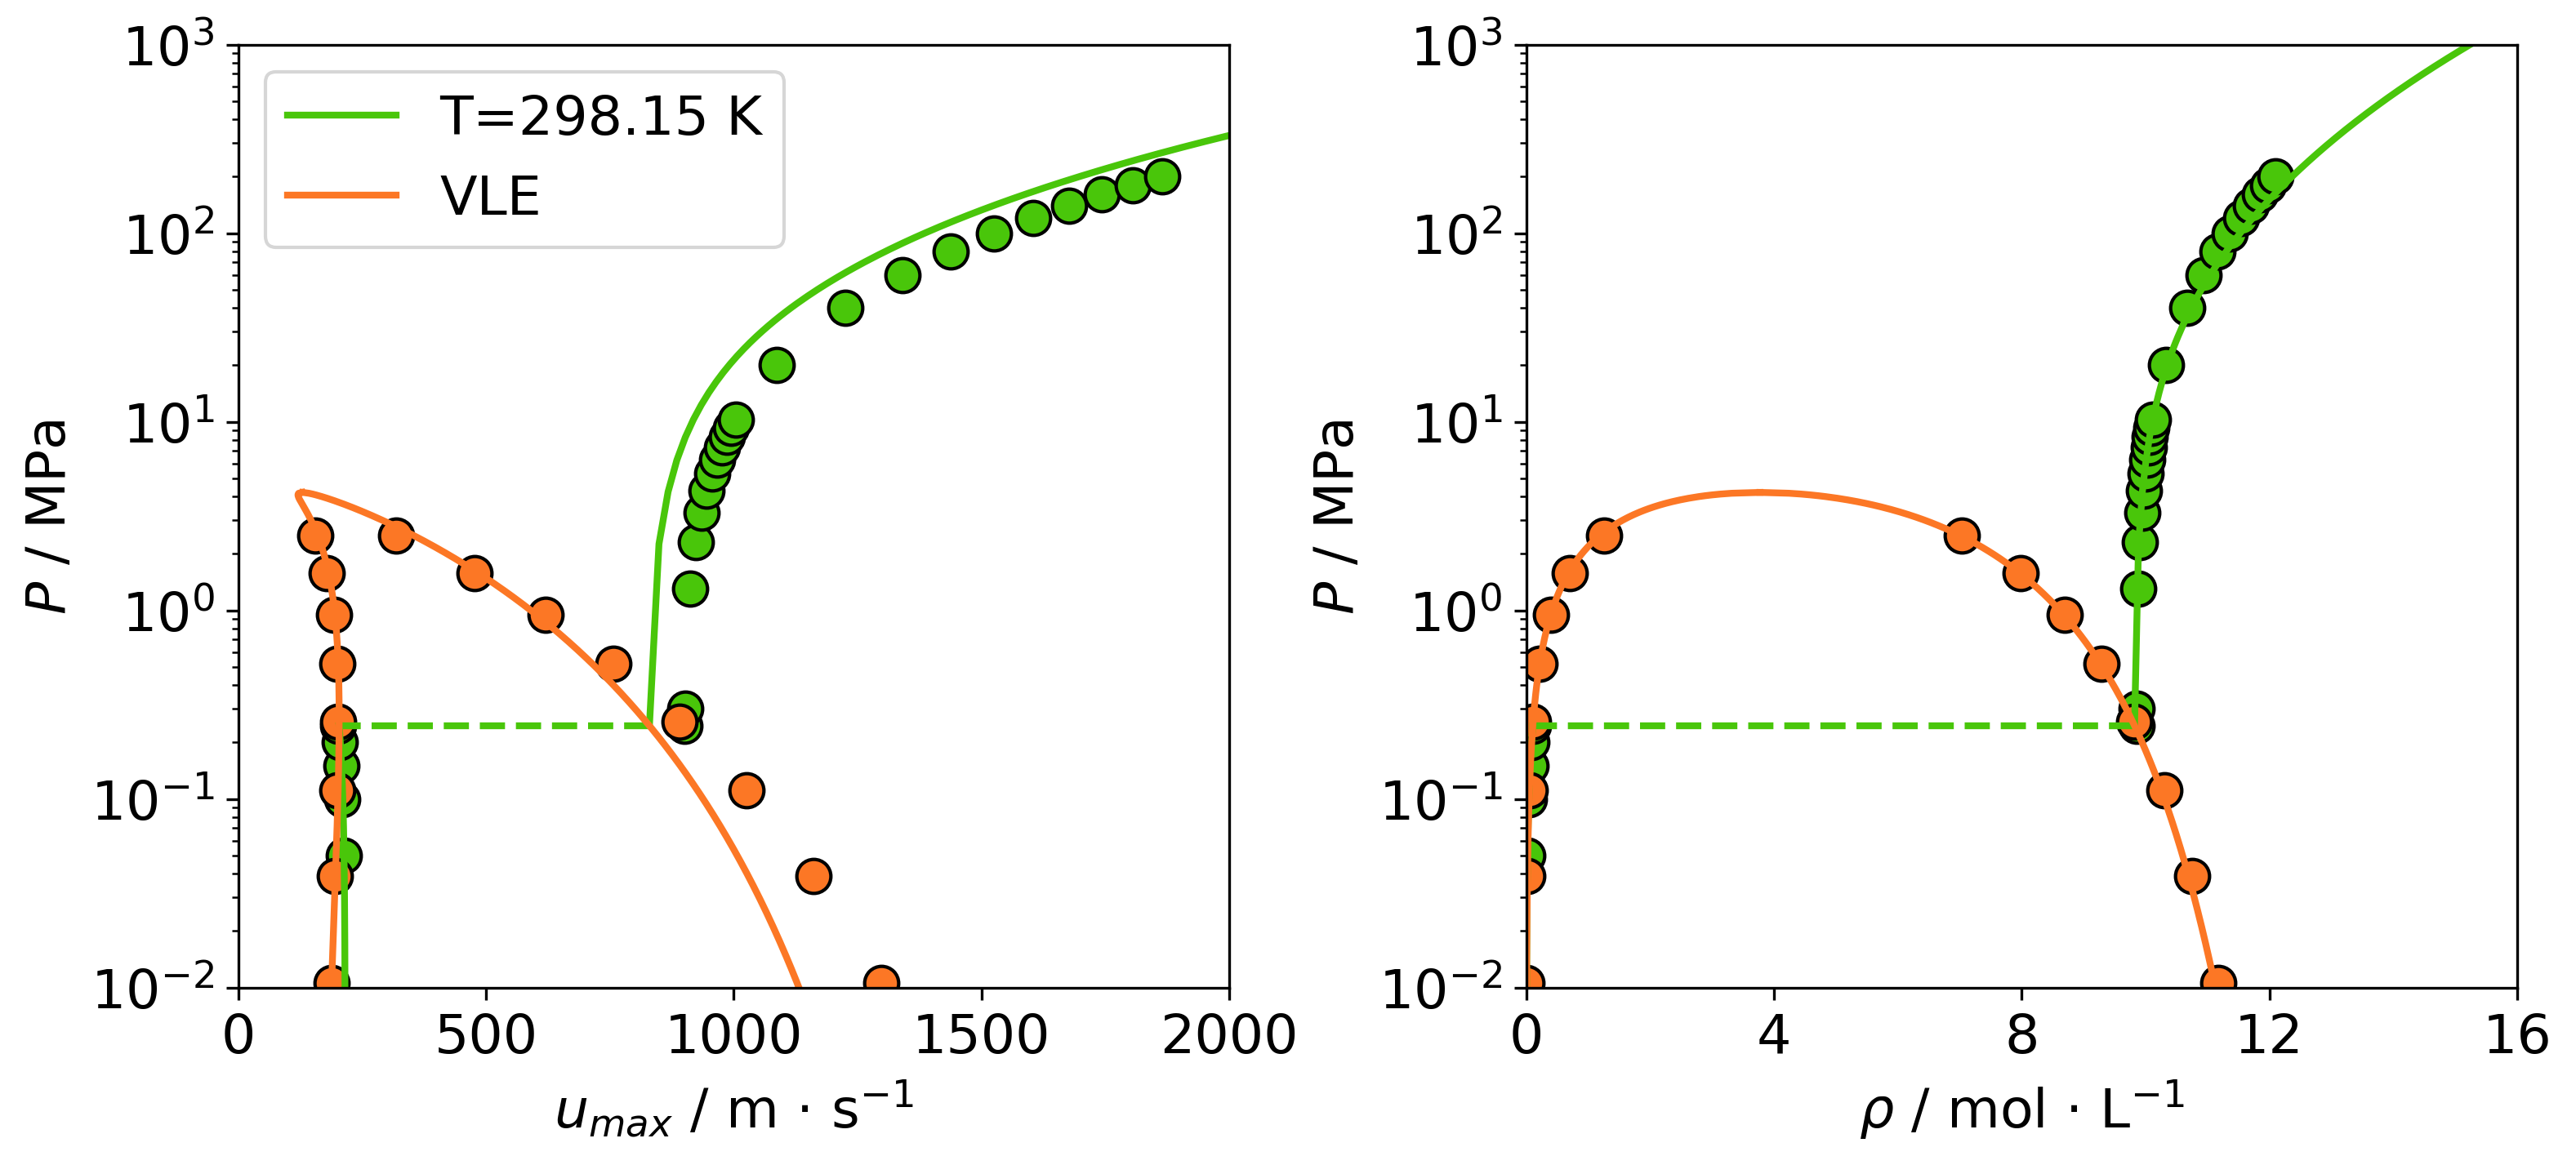

In [24]:
# NIST information
Tsat_NIST = np.array([150, 175, 200, 225, 250, 275, 300, 325, 
                      350, 375, 400])                                          # K
Psat_NIST = np.array([8.57E-06, 0.00020064, 0.001939, 0.010573,
                      0.039153, 0.11065, 0.2576, 0.52012, 0.94417, 
                      1.5816, 2.4954])                                         # MPa  
uLsat_NIST = np.array([1729.8, 1581, 1438.2, 1298.4, 1160.9, 1025.2, 
                       890.88, 756.71, 620.37, 477.25, 318.35])                # m/s
uVsat_NIST = np.array([156.46, 168.21, 178.87, 188.16, 195.57, 
                       200.46, 202.15, 199.87, 192.54, 178.5, 154.77])         # m/s     
rhoLsat_NIST = np.array([12.403, 12.002, 11.596, 11.182, 10.752, 10.301, 
                         9.8186, 9.2899, 8.6916, 7.9783, 7.028])               # mol / L
rhoVsat_NIST = np.array([0.000006874, 0.00013795, 0.0011686, 0.0056973, 
                         0.019239, 0.050611, 0.11212, 0.22075, 0.40241, 
                         0.70553, 1.2573])                                     # mol / L

P1_NIST = np.array([0.05, 0.1, 0.15, 0.2, 0.24329,0.24329, 0.3, 1.3, 
                    2.3, 3.3, 4.3, 5.3, 6.3, 7.3, 8.3, 9.3, 10.3, 
                    20, 40, 60, 80, 100, 120, 140, 160, 180, 200])             # MPa
u1_NIST = np.array([213.25, 210.56, 207.75, 204.81, 202.15, 900.79, 901.45, 
                    912.92, 924.08, 934.95, 945.56, 955.92, 966.04, 975.95, 
                    985.65, 995.16, 1004.5, 1087, 1226.2, 1340.2, 1438.5, 
                    1525.6, 1604.3, 1676.6, 1743.5, 1806.1, 1865])             # m/s
rho1_NIST = np.array([0.020468, 0.041572, 0.063375, 0.085952, 0.10619, 
                      9.8557, 9.8574, 9.887, 9.9157, 9.9436, 9.9708, 
                      9.9974, 10.023, 10.049, 10.073, 10.097, 10.121, 
                      10.328, 10.669, 10.94, 11.168, 11.365, 11.541, 
                      11.7, 11.845, 11.979, 12.104])                           # mol / L


font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


color1 = "#49C60A"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
# Isothermal
ax.scatter(u1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(uL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(uV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([uLsat1, uVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(uLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(uVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(uLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(uVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)
# Plot configurations
ax.legend()
ax.set_xlabel(r'$u_{max}$ / m $\cdot$ s$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([0, 2000., 1e-2, 1000.])
ax.set_yscale('log')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))

ax = axs[1]
# Isothermal
ax.scatter(rho1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(1e-3/vV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([1e-3/vLsat1, 1e-3/vVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(rhoLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(rhoVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(1e-3/vVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)
# Plot configurations
ax.set_xlabel(r'$\rho$ / mol $\cdot$ L$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([0, 16., 1e-2, 1000.])
ax.set_yscale('log')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
plt.show()

# Square Gradient Theory for Pure Components
Using the open-source python package: sgtpy (https://github.com/gustavochm/sgtpy)

In [25]:
from sgtpy.sgt import sgt_pure
from sgtpy.fit import fit_cii

First, the influence parameter ($c_{ii}$) is fitting from experimental interfacial tension data.

In [26]:
# NIST information
Tsat_NIST = np.array([150, 175, 200, 225, 250, 275, 300, 325, 
                      350, 375, 400], dtype=float)                # K
tension_NIST = np.array([30.361, 27.058, 23.823, 20.663, 
                         17.584, 14.597, 11.711, 8.9449, 
                         6.3203, 3.8751, 1.6813])                 # mN/m

nexp = len(Tsat_NIST)
Psaft = np.zeros(nexp)
rhosaftl = np.zeros(nexp)
rhosaftv = np.zeros(nexp)
for i in range(nexp):                   
    Psaft[i], vLsat, vVsat = saft.psat(Tsat_NIST[i])           
    rhosaftl[i], rhosaftv[i] =  1./vLsat, 1./vVsat  
fit_cii(tension_NIST, Tsat_NIST, Psaft, rhosaftl, rhosaftv, saft, deg=0)

array([1.68587714e-19])

Redefine the equation of state with the new parameter

In [27]:
c4 = component('Butane', ms = 2.3316, sigma = 3.7086, eps = 222.88, 
               cii = 1.68587714e-19, Mw = 58.1222)
saft = pcsaft(c4)

In [28]:
T0 = 100.
Tf = saft.Tc
n = 100                            # Number of points
Tsat = np.linspace(T0, Tf, n)      # Temperature vector
Psat = np.zeros_like(Tsat)         # Vector to save the information
tension  = np.zeros_like(Tsat)
for i in range(n - 1):                   
    Psat[i], vL, vV = saft.psat(Tsat[i])                # Solving and saving the VLE
    tension[i] = sgt_pure(1/vL, 1/vV, Tsat[i], 
                          Psat[i], saft)                # Solving SGT equation
Psat[-1], tension[-1] = saft.Pc, 0.                     # Saving the critical point

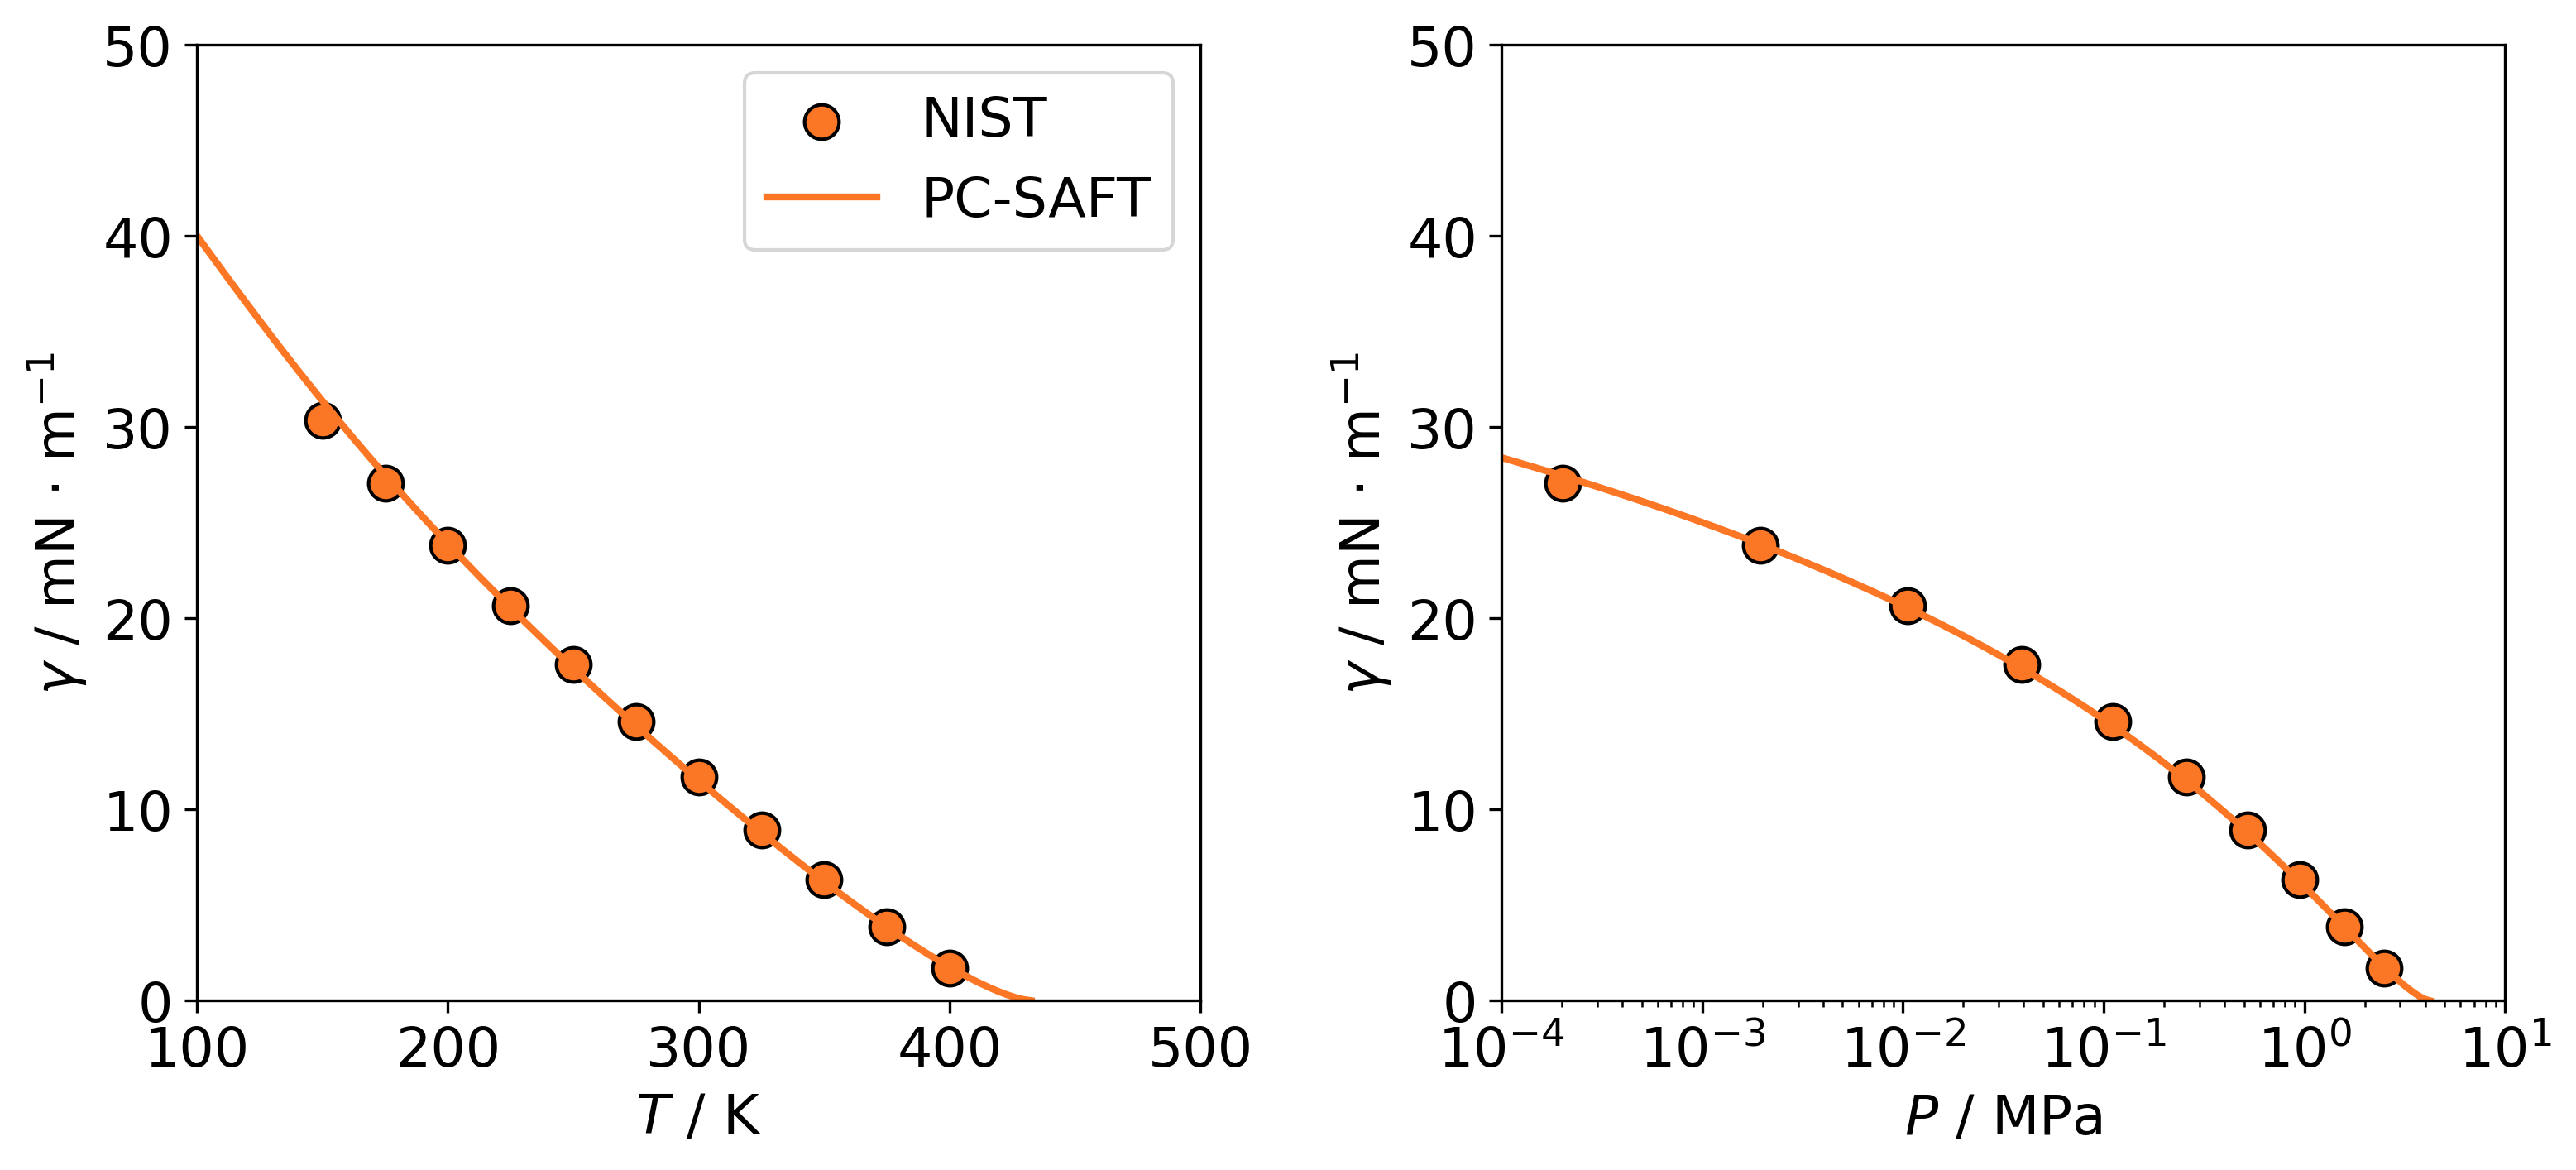

In [29]:
# NIST information
Tsat_NIST = np.array([150, 175, 200, 225, 250, 275, 300, 325, 
                      350, 375, 400], dtype=float)                # K
tension_NIST = np.array([30.361, 27.058, 23.823, 20.663, 
                         17.584, 14.597, 11.711, 8.9449, 
                         6.3203, 3.8751, 1.6813])                 # mN/m
Psat_NIST = np.array([8.57E-06, 0.00020064, 0.001939, 0.010573, 
                      0.039153, 0.11065, 0.2576, 0.52012, 0.94417, 
                      1.5816, 2.4954])                            # MPa

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


colorVLE = "#FC7725"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
ax.scatter(Tsat_NIST, tension_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "NIST")
ax.plot(Tsat, tension, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")

ax.set_xlabel('$T$ / K')
ax.set_ylabel(r'$\gamma$ / mN $\cdot$ m$^{-1}$')
ax.axis([100, 500., 0, 50.])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 6))

ax.legend()

ax = axs[1]
ax.scatter(Psat_NIST, tension_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "NIST")
ax.plot(Psat * 1e-6, tension, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.set_xlabel('$P$ / MPa')
ax.set_ylabel(r'$\gamma$ / mN $\cdot$ m$^{-1}$')
ax.axis([1e-4, 10., 0, 50.])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
ax.set_xscale('log')

plt.show()

Density profile at 298.15 K

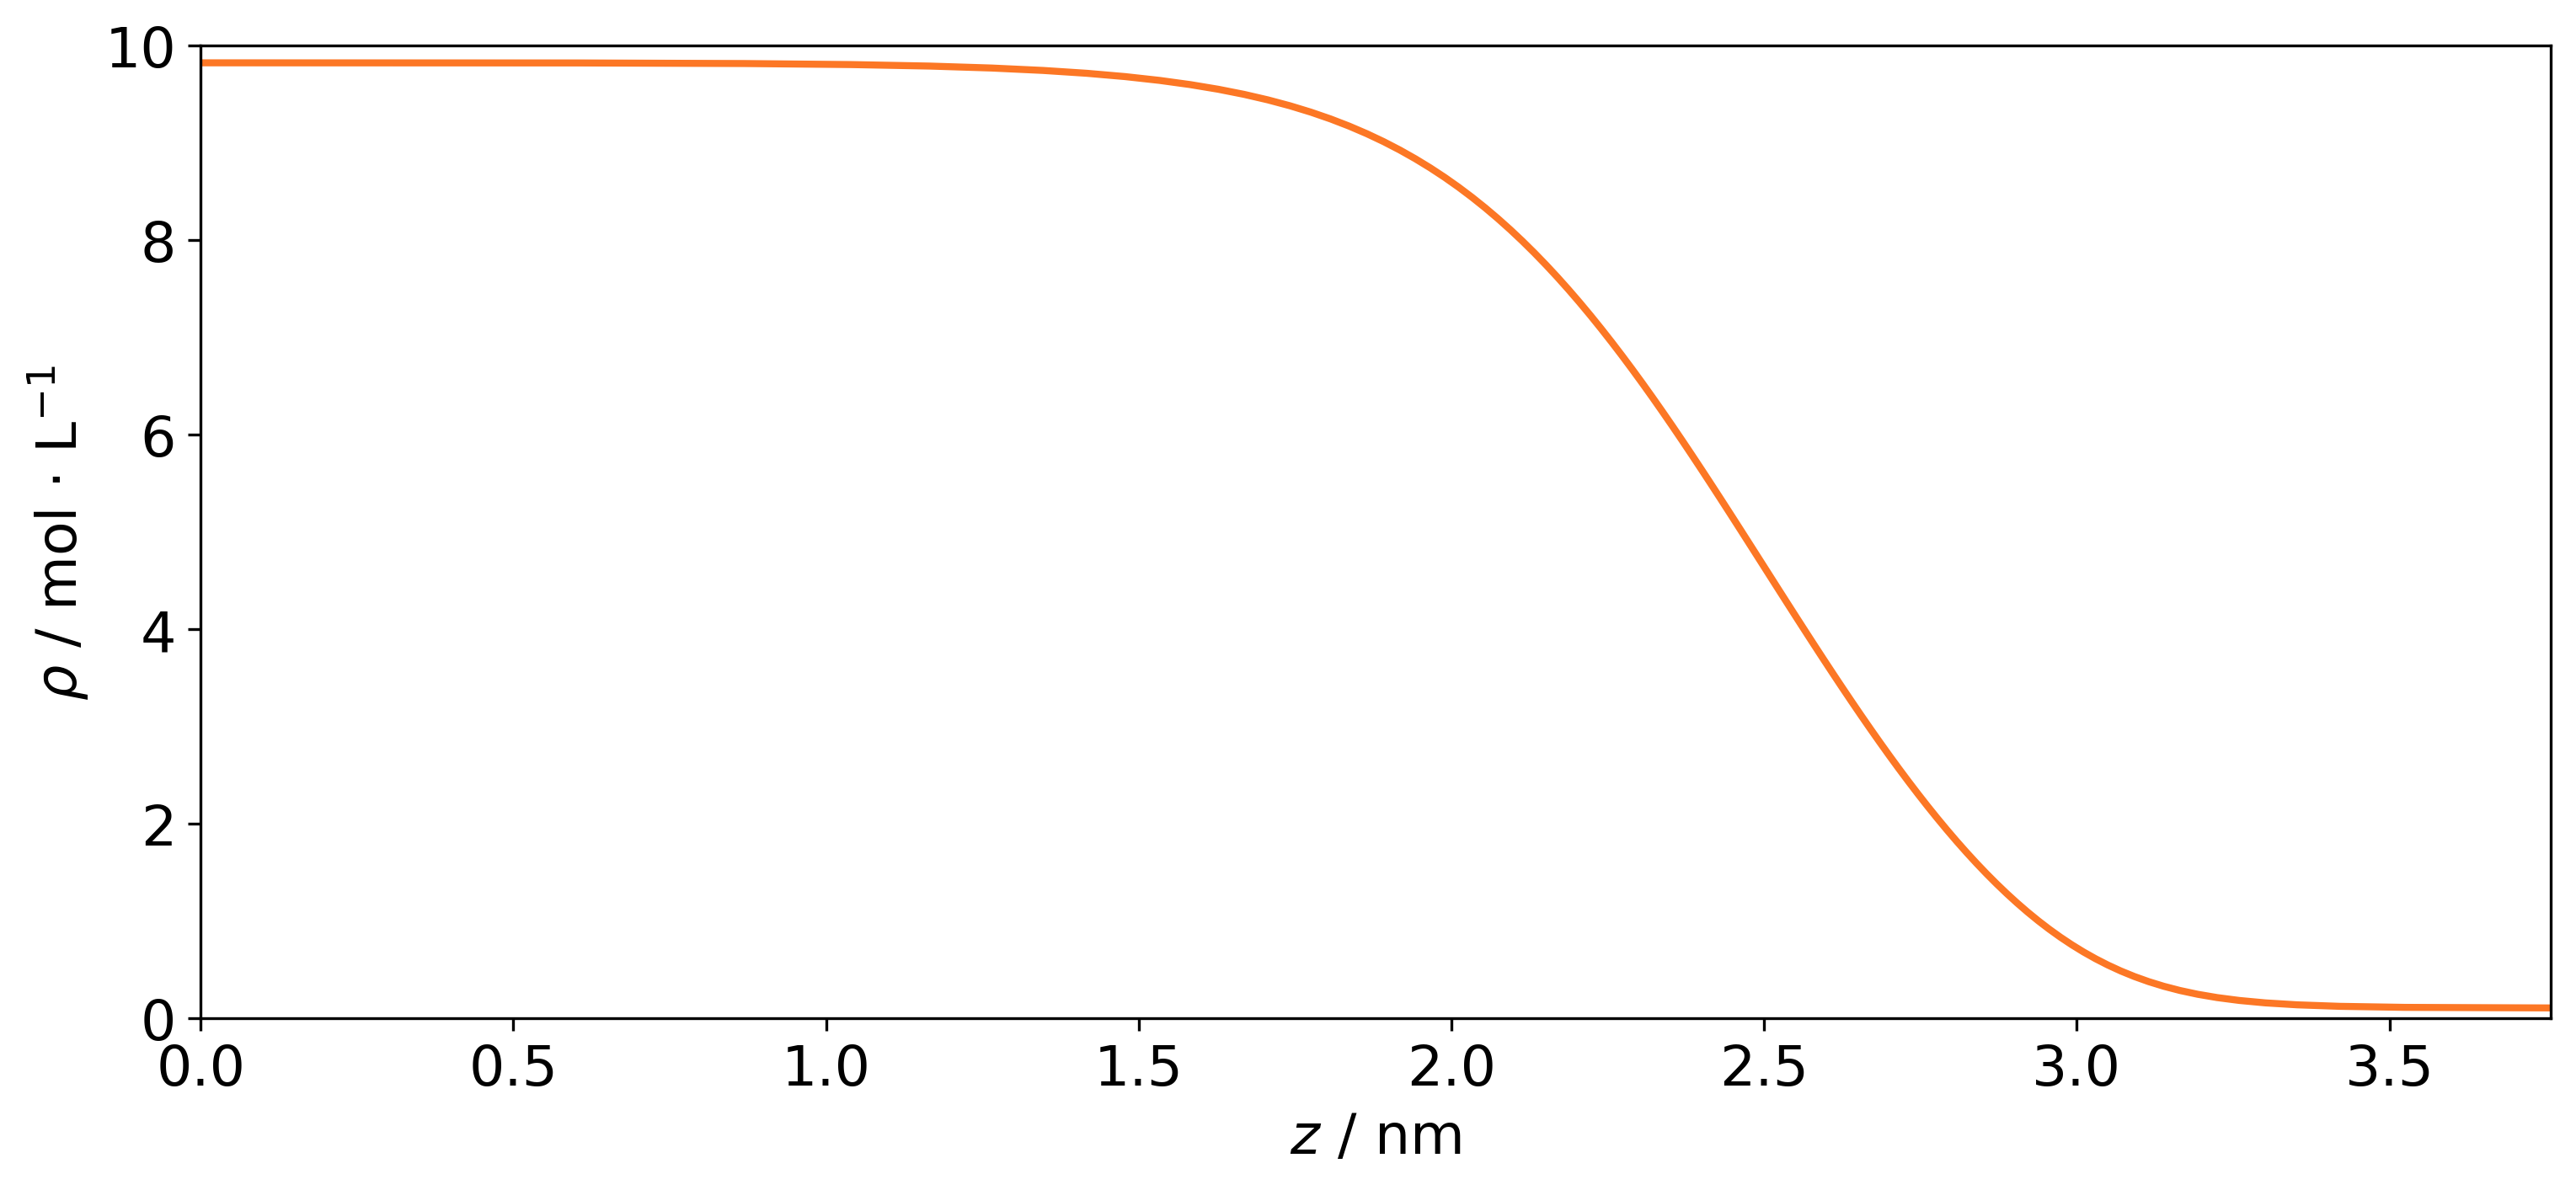

In [30]:
Tsat = 298.15        
Psat, vL, vV = saft.psat(Tsat)                   
out = sgt_pure(1/vL, 1/vV, Tsat, Psat, 
                      saft, full_output=True)   

fig, ax = plt.subplots(1,1, figsize=(12, 5), dpi = 300)

z   = np.append(0, out.z)/10 # Amstrong to nm & adding the bulk phase (liquid-phase)
rho = np.append(1/vL, out.rho) * 1e-3
colorVLE = "#FC7725"
ax.plot(z, rho, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")

ax.set_xlabel('$z$ / nm')
ax.set_ylabel(r'$\rho$ / mol $\cdot$ L$^{-1}$')
ax.axis([0, max(z), 0, 10.])
plt.show()